# Bank Clients Churn Prediction

**Goal**: based on historical data (*CustomerId, Surname, CreditScore, Geography, Gender, Age, Tenure, Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary*) build a model predicting clients' churn (*Exited*)

**Criterea**: key metric - *F1*-score, cut-off value 0.59; additionaly check AUC-ROC

Data Source: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Data-and-Libraries-Import" data-toc-modified-id="Data-and-Libraries-Import-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data and Libraries Import</a></span></li><li><span><a href="#Working-With-Missing-Data" data-toc-modified-id="Working-With-Missing-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Working With Missing Data</a></span></li><li><span><a href="#Filtering-data" data-toc-modified-id="Filtering-data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Filtering data</a></span></li><li><span><a href="#OHE" data-toc-modified-id="OHE-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>OHE</a></span></li><li><span><a href="#Subsets-Creation" data-toc-modified-id="Subsets-Creation-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Subsets Creation</a></span></li><li><span><a href="#Numeric-Features-Normalization" data-toc-modified-id="Numeric-Features-Normalization-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Numeric Features Normalization</a></span></li></ul></li><li><span><a href="#Research" data-toc-modified-id="Research-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Research</a></span><ul class="toc-item"><li><span><a href="#Class-Balance" data-toc-modified-id="Class-Balance-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Class Balance</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Sanity-Test" data-toc-modified-id="Sanity-Test-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sanity Test</a></span></li><li><span><a href="#Conlusion" data-toc-modified-id="Conlusion-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Conlusion</a></span></li></ul></li><li><span><a href="#Fighting-Disbalance" data-toc-modified-id="Fighting-Disbalance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fighting Disbalance</a></span><ul class="toc-item"><li><span><a href="#Class-Weighting" data-toc-modified-id="Class-Weighting-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Class Weighting</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Upsampling" data-toc-modified-id="Upsampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Upsampling</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Downsampling" data-toc-modified-id="Downsampling-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Downsampling</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model-Testing" data-toc-modified-id="Model-Testing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Testing</a></span><ul class="toc-item"><li><span><a href="#Test-Subset-Metrics" data-toc-modified-id="Test-Subset-Metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Test Subset Metrics</a></span></li><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-curve-and-AUC-ROC" data-toc-modified-id="ROC-curve-and-AUC-ROC-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ROC-curve and AUC-ROC</a></span></li></ul></li><li><span><a href="#Overall-Conclusion" data-toc-modified-id="Overall-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Overall Conclusion</a></span></li></ul></div>

## Data Preparation

### Data and Libraries Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.dummy import DummyClassifier
from sklearn.utils import shuffle

In [2]:
df = pd.read_csv('/datasets/Churn.csv', index_col = 'RowNumber')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Data looks OK, though *Tenure* has almost a thousand null values.

### Working With Missing Data

What values does *Tenure* take:

In [3]:
df['Tenure'].value_counts(dropna=False)

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
NaN     909
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [4]:
df.query('~(Tenure > -1)')['Exited'].value_counts()

0    726
1    183
Name: Exited, dtype: int64

Tenure might be from 0 to 10. There are 183 exited clients with missing *Tenure* data.

The only parameter avaliable that might be connected to *Tenure* is *CustomerId*. Let's check if this connection exists.

<AxesSubplot:xlabel='Tenure', ylabel='CustomerId'>

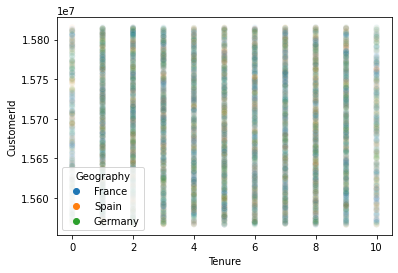

In [5]:
sns.scatterplot(x=df['Tenure'], y=df['CustomerId'], alpha=0.05, hue = df['Geography'])

It does not look like this connection exists, but it is worth taking a closer look.

<AxesSubplot:xlabel='Tenure', ylabel='CustomerId'>

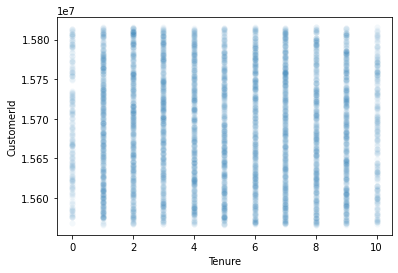

In [6]:
sns.scatterplot(x='Tenure', y='CustomerId', alpha=0.05, data = df[df['Geography'] == 'France'])

<AxesSubplot:xlabel='Tenure', ylabel='CustomerId'>

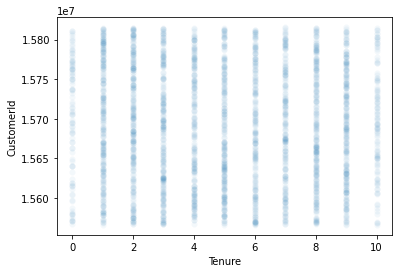

In [7]:
sns.scatterplot(x='Tenure', y='CustomerId', alpha=0.05, data = df[df['Geography'] == 'Germany'])

<AxesSubplot:xlabel='Tenure', ylabel='CustomerId'>

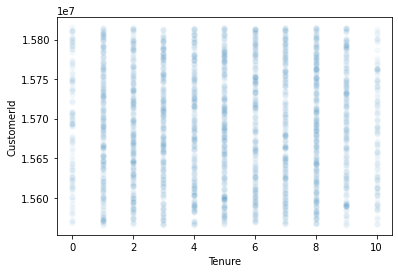

In [8]:
sns.scatterplot(x='Tenure', y='CustomerId', alpha=0.05, data = df[df['Geography'] == 'Spain'])

Now we are sure *CustomerId* is generated regardless of *Tenure*. Thus, no relevant ways to fill in the gaps can be found. This missing values cover less than 10% of data, so we can just drop thise lines.

In [9]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 1 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9091 non-null   int64  
 1   Surname          9091 non-null   object 
 2   CreditScore      9091 non-null   int64  
 3   Geography        9091 non-null   object 
 4   Gender           9091 non-null   object 
 5   Age              9091 non-null   int64  
 6   Tenure           9091 non-null   float64
 7   Balance          9091 non-null   float64
 8   NumOfProducts    9091 non-null   int64  
 9   HasCrCard        9091 non-null   int64  
 10  IsActiveMember   9091 non-null   int64  
 11  EstimatedSalary  9091 non-null   float64
 12  Exited           9091 non-null   int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 994.3+ KB


### Filtering data

Customers' surnames would not help in making prognosis on clients' exiting, moreover, using this information would be unethical, so it is necessary to drop this coloumn.

In [10]:
df_filt = df.drop(columns = 'Surname')
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9091 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9091 non-null   int64  
 1   CreditScore      9091 non-null   int64  
 2   Geography        9091 non-null   object 
 3   Gender           9091 non-null   object 
 4   Age              9091 non-null   int64  
 5   Tenure           9091 non-null   float64
 6   Balance          9091 non-null   float64
 7   NumOfProducts    9091 non-null   int64  
 8   HasCrCard        9091 non-null   int64  
 9   IsActiveMember   9091 non-null   int64  
 10  EstimatedSalary  9091 non-null   float64
 11  Exited           9091 non-null   int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 923.3+ KB


### OHE
Use one-hot encoding for categorial features 

In [11]:
df_filt['Gender'].value_counts(dropna=False)

Male      4974
Female    4117
Name: Gender, dtype: int64

In [12]:
df_filt['Geography'].value_counts(dropna=False)

France     4550
Germany    2293
Spain      2248
Name: Geography, dtype: int64

In [13]:
df_filt['NumOfProducts'].value_counts(dropna=False)

1    4617
2    4184
3     234
4      56
Name: NumOfProducts, dtype: int64

In [14]:
df_ohe = pd.get_dummies(df_filt, columns=['Gender', 'Geography', 'NumOfProducts'], drop_first=True)
df_ohe.head()

,CustomerId,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,,,
1,15634602,619,42,2.0,0.00,1,1,101348.88,1,0,0,0,0,0,0
2,15647311,608,41,1.0,83807.86,0,1,112542.58,0,0,0,1,0,0,0
3,15619304,502,42,8.0,159660.80,1,0,113931.57,1,0,0,0,0,1,0
4,15701354,699,39,1.0,0.00,0,0,93826.63,0,0,0,0,1,0,0
5,15737888,850,43,2.0,125510.82,1,1,79084.10,0,0,0,1,0,0,0


### Subsets Creation

Distinguish features and target, then split data into training, validation and test subsets.

In [15]:
target = df_ohe['Exited']
features = df_ohe.drop(['Exited', 'CustomerId'], axis=1)
display(features, target)

,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,
1,619,42,2.0,0.00,1,1,101348.88,0,0,0,0,0,0
2,608,41,1.0,83807.86,0,1,112542.58,0,0,1,0,0,0
3,502,42,8.0,159660.80,1,0,113931.57,0,0,0,0,1,0
4,699,39,1.0,0.00,0,0,93826.63,0,0,0,1,0,0
5,850,43,2.0,125510.82,1,1,79084.10,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,800,29,2.0,0.00,0,0,167773.55,0,0,0,1,0,0
9996,771,39,5.0,0.00,1,0,96270.64,1,0,0,1,0,0
9997,516,35,10.0,57369.61,1,1,101699.77,1,0,0,0,0,0


RowNumber
1       1
2       0
3       1
4       0
5       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    1
Name: Exited, Length: 9091, dtype: int64

In [16]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.4, random_state=12345)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

### Numeric Features Normalization



In [17]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

pd.options.mode.chained_assignment = None


features_train.head()

/tmp/ipykernel_883/1290318879.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,CreditScore,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
RowNumber,,,,,,,,,,,,,
9345,0.809075,-1.039327,-1.025995,0.554904,1,0,0.019508,0,0,0,0,0,0
3797,-1.152518,-1.227561,0.696524,0.480609,0,0,0.056167,1,0,0,0,0,0
7463,-0.398853,0.090079,1.385532,-1.237830,1,1,0.848738,1,0,0,0,0,0
1509,-0.749875,-0.286389,0.352020,-1.237830,1,1,-0.894953,1,0,0,1,0,0
4479,-1.028628,-0.756975,-0.336987,-1.237830,0,1,-1.284516,1,0,0,1,0,0


## Research

### Class Balance

In [18]:
df_ohe['Exited'].value_counts(normalize=True)

0    0.796062
1    0.203938
Name: Exited, dtype: float64

4 times more clients stayed with the bank than left it, sufficient class disbalance can be detected. So, I will first run a few models on unbalanced data to see the key metrics values, to be able to compare them with those afler balancing techniques application.

### Decision Tree

In [19]:
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_train, target_train)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt:
        best_depth_dt = depth
        best_f1_dt = f1_dt
        best_model_dt= model_dt
        best_accuracy_dt = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth {best_depth_dt}, f1-score : {best_f1_dt}, accuracy : {best_accuracy_dt}')  

Best Decision Tree model with depth 2, f1-score : 0.5641711229946524, accuracy : 0.8206820682068207


### Random Forest

In [20]:
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_train, target_train)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf:
            best_model_rf = model_rf
            best_est_rf = est
            best_depth_rf = depth
            best_f1_rf = f1_rf
            best_accuracy_rf = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf} trees with maximum depth  {best_depth_rf}, F1: - {best_f1_rf}, accuracy - {best_accuracy_rf}')

Best Random Forest model with 50 trees with maximum depth  17, F1: - 0.6065573770491803, accuracy - 0.8679867986798679


Random Forest model has 50 much deeper trees, but F1-score differs very slightly from Decision Tree model with max depth of 2.

### Logistic Regression

In [21]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr.fit(features_train, target_train)
predictions_valid = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predictions_valid)
accuracy_lr = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr}, accuracy : {accuracy_lr}')

Logistic Regression Model F1-score: 0.5068493150684932, accuracy : 0.8415841584158416


F1-score for Logistic Regression is even lower, than for the simpliest Decision Tree.

### Sanity Test

In [22]:
dummy = DummyClassifier(strategy='stratified', random_state=12345).fit(features_train, target_train)
dummy_pred = dummy.predict(features_valid)
print('Dummy-model F1-score for validation subset:', f1_score(target_valid, dummy_pred))
print('Dummy-model accuracy for validation subset:', accuracy_score(target_valid, dummy_pred))

Dummy-model F1-score for validation subset: 0.20000000000000004
Dummy-model accuracy for validation subset: 0.6655665566556656


The models built are better than dummy, but F1-score targeted is 0.59. I will test my best model so far on the test subset.

In [23]:
predictions_test = best_model_rf.predict(features_test)
print('F1-score for test subset:', f1_score(target_test, predictions_test))
print('Best Random Forest Model accuracy for test subset:', accuracy_score(target_test, predictions_test))

F1-score for test subset: 0.563380281690141
Best Random Forest Model accuracy for test subset: 0.8636613523914238


### Conlusion
All of the tree models validated have passed sanity test. But even the best model (so far) did not give sufficient F1-score on test subset. Working with disbalance should help here.

## Fighting Disbalance

### Class Weighting


#### Decision Tree

In [24]:
best_model_dt = None
best_depth_dt = 0
best_f1_dt = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
    model_dt.fit(features_train, target_train)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt:
        best_depth_dt = depth
        best_f1_dt = f1_dt
        best_model_dt= model_dt
        best_accuracy_dt = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth {best_depth_dt}, f1-score : {best_f1_dt}, accuracy : {best_accuracy_dt}')  

Best Decision Tree model with depth 4, f1-score : 0.5875, accuracy : 0.7821782178217822


It's getting better, but the result is still insufficient.

#### Random Forest

In [25]:
best_model_rf = None
best_est_rf = 0
best_depth_rf = 0
best_f1_rf = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model_rf.fit(features_train, target_train)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf:
            best_model_rf = model_rf
            best_est_rf = est
            best_depth_rf = depth
            best_f1_rf = f1_rf
            best_accuracy_rf = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf} trees with maximum depth  {best_depth_rf}, F1: - {best_f1_rf}, accuracy - {best_accuracy_rf}')

Best Random Forest model with 50 trees with maximum depth  12, F1: - 0.651685393258427, accuracy - 0.8635863586358636


Accuracy is hihger than for Decision Tree, but F1 is still below target value.

#### Logistic Regression

In [26]:
model_lr = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
model_lr.fit(features_train, target_train)
predictions_valid = model_lr.predict(features_valid)
f1_lr = f1_score(target_valid, predictions_valid)
accuracy_lr = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr}, accuracy : {accuracy_lr}')

Logistic Regression Model F1-score: 0.575098814229249, accuracy : 0.7634763476347635


Logistic regression results are also unsatisfactory. Upsampling and downsampling are to be tried to improve modelling results.

### Upsampling 

In [27]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

# 2, 5 and 10 times upsampling

features_upsampled2, target_upsampled2 = upsample(features_train, target_train, 2)
features_upsampled5, target_upsampled5 = upsample(features_train, target_train, 5)
features_upsampled10, target_upsampled10 = upsample(features_train, target_train, 10)

#### Decision Tree

In [28]:
best_model_dt2 = None
best_depth_dt2 = 0
best_f1_dt2 = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_upsampled2, target_upsampled2)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt2:
        best_depth_dt2 = depth
        best_f1_dt2 = f1_dt
        best_model_dt2 = model_dt
        best_accuracy_dt2 = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth{best_depth_dt2}, f1-score : {best_f1_dt2}, accuracy : {best_accuracy_dt2}')  

Best Decision Tree model with depth4, f1-score : 0.5942571785268415, accuracy : 0.8212321232123212


In [29]:
best_model_dt5 = None
best_depth_dt5 = 0
best_f1_dt5 = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_upsampled5, target_upsampled5)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt5:
        best_depth_dt5 = depth
        best_f1_dt5 = f1_dt
        best_model_dt5 = model_dt
        best_accuracy_dt5 = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth{best_depth_dt5}, f1-score : {best_f1_dt5}, accuracy : {best_accuracy_dt5}')

Best Decision Tree model with depth4, f1-score : 0.5727878211227402, accuracy : 0.753025302530253


In [30]:
best_model_dt10 = None
best_depth_dt10 = 0
best_f1_dt10 = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_upsampled10, target_upsampled10)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt10:
        best_depth_dt10 = depth
        best_f1_dt10 = f1_dt
        best_model_dt10 = model_dt
        best_accuracy_dt10 = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth{best_depth_dt10}, f1-score : {best_f1_dt10}, accuracy : {best_accuracy_dt10}')

Best Decision Tree model with depth7, f1-score : 0.518578352180937, accuracy : 0.6721672167216721


For Decision Tree model best result is achieved for x2 upsampling.

#### Random Forest

In [31]:
best_model_rf2 = None
best_est_rf2 = 0
best_depth_rf2 = 0
best_f1_rf2 = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_upsampled2, target_upsampled2)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf2:
            best_model_rf2 = model_rf
            best_est_rf2 = est
            best_depth_rf2 = depth
            best_f1_rf2 = f1_rf
            best_accuracy_rf2 = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf2} trees with maximum depth  {best_depth_rf2}, F1: - {best_f1_rf2}, accuracy - {best_accuracy_rf2}')

Best Random Forest model with 20 trees with maximum depth  9, F1: - 0.6464646464646465, accuracy - 0.8652365236523653


In [32]:
best_model_rf5 = None
best_est_rf5 = 0
best_depth_rf5 = 0
best_f1_rf5 = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_upsampled5, target_upsampled5)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf5:
            best_model_rf5 = model_rf
            best_est_rf5 = est
            best_depth_rf5 = depth
            best_f1_rf5 = f1_rf
            best_accuracy_rf5 = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf5} trees with maximum depth  {best_depth_rf5}, F1: - {best_f1_rf5}, accuracy - {best_accuracy_rf5}')

Best Random Forest model with 50 trees with maximum depth  15, F1: - 0.6263157894736843, accuracy - 0.8437843784378438


In [33]:
best_model_rf10 = None
best_est_rf10 = 0
best_depth_rf10 = 0
best_f1_rf10 = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_upsampled10, target_upsampled10)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf10:
            best_model_rf10 = model_rf
            best_est_rf10 = est
            best_depth_rf10 = depth
            best_f1_rf10 = f1_rf
            best_accuracy_rf10 = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf10} trees with maximum depth  {best_depth_rf10}, F1: - {best_f1_rf10}, accuracy - {best_accuracy_rf10}')

Best Random Forest model with 50 trees with maximum depth  18, F1: - 0.6248294679399727, accuracy - 0.8487348734873488


Same here, 2 times upsampling works best.

#### Logistic Regression

In [34]:
model_lr2 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr2.fit(features_upsampled2, target_upsampled2)
predictions_valid = model_lr2.predict(features_valid)
f1_lr2 = f1_score(target_valid, predictions_valid)
accuracy_lr2 = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr2}, accuracy : {accuracy_lr2}')

Logistic Regression Model F1-score: 0.586021505376344, accuracy : 0.8305830583058306


In [35]:
model_lr5 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr5.fit(features_upsampled5, target_upsampled5)
predictions_valid = model_lr5.predict(features_valid)
f1_lr5 = f1_score(target_valid, predictions_valid)
accuracy_lr5 = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr5}, accuracy : {accuracy_lr5}')

Logistic Regression Model F1-score: 0.5462633451957295, accuracy : 0.7194719471947195


In [36]:
model_lr10 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr10.fit(features_upsampled10, target_upsampled10)
predictions_valid = model_lr10.predict(features_valid)
f1_lr10 = f1_score(target_valid, predictions_valid)
accuracy_lr10 = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr10}, accuracy : {accuracy_lr10}')

Logistic Regression Model F1-score: 0.4699453551912568, accuracy : 0.5731573157315731


Logistic Regression model did not reach the target result even after upsampling.

### Downsampling

Upsampling gave sufficient results, but downsampling is worth testing as well.

In [43]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

# Downsampling 2, 5 and 10 times

features_downsampled2, target_downsampled2 = downsample(features_train, target_train, 0.5)
features_downsampled5, target_downsampled5 = downsample(features_train, target_train, 0.2)
features_downsampled10, target_downsampled10 = downsample(features_train, target_train, 0.1)

#### Decision Tree

In [44]:
best_model_dt_d2 = None
best_depth_dt_d2 = 0
best_f1_dt_d2 = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_downsampled2, target_downsampled2)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt_d2:
        best_depth_dt_d2 = depth
        best_f1_dt_d2 = f1_dt
        best_model_dt_d2 = model_dt
        best_accuracy_dt_d2 = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth {best_depth_dt_d2}, f1-score : {best_f1_dt_d2}, accuracy : {best_accuracy_dt_d2}')    

Best Decision Tree model with depth 5, f1-score : 0.596078431372549, accuracy : 0.83003300330033


In [45]:
best_model_dt_d5 = None
best_depth_dt_d5 = 0
best_f1_dt_d5 = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_downsampled5, target_downsampled5)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt_d5:
        best_depth_dt_d5 = depth
        best_f1_dt_d5 = f1_dt
        best_model_dt_d5 = model_dt
        best_accuracy_dt_d5 = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth {best_depth_dt_d5}, f1-score : {best_f1_dt_d5}, accuracy : {best_accuracy_dt_d5}')  

Best Decision Tree model with depth 4, f1-score : 0.5618181818181819, accuracy : 0.7348734873487349


In [46]:
best_model_dt_d10 = None
best_depth_dt_d10 = 0
best_f1_dt_d10 = 0
for depth in range(1,20):
    model_dt = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model_dt.fit(features_downsampled10, target_downsampled10)
    predictions_valid = model_dt.predict(features_valid)
    f1_dt = f1_score(target_valid, predictions_valid)
    if f1_dt > best_f1_dt_d10:
        best_depth_dt_d10 = depth
        best_f1_dt_d10 = f1_dt
        best_model_dt_d10 = model_dt
        best_accuracy_dt_d10 = accuracy_score(target_valid, predictions_valid)
print(f'Best Decision Tree model with depth {best_depth_dt_d10}, f1-score : {best_f1_dt_d10}, accuracy : {best_accuracy_dt_d10}')  

Best Decision Tree model with depth 8, f1-score : 0.48299791811242193, accuracy : 0.5902090209020903


Two times downsampling works best for Decision Tree model.

#### Random Forest

In [47]:
best_model_rf_d2 = None
best_est_rf_d2 = 0
best_depth_rf_d2 = 0
best_f1_rf_d2 = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_downsampled2, target_downsampled2)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf_d2:
            best_model_rf_d2 = model_rf
            best_est_rf_d2 = est
            best_depth_rf_d2 = depth
            best_f1_rf_d2 = f1_rf
            best_accuracy_rf_d2 = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf_d2} trees with maximum depth  {best_depth_rf_d2}, F1: - {best_f1_rf_d2}, accuracy - {best_accuracy_rf_d2}')

Best Random Forest model with 50 trees with maximum depth  11, F1: - 0.6441136671177267, accuracy - 0.8553355335533553


In [48]:
best_model_rf_d5 = None
best_est_rf_d5 = 0
best_depth_rf_d5 = 0
best_f1_rf_d5 = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_downsampled5, target_downsampled5)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf_d5:
            best_model_rf_d5 = model_rf
            best_est_rf_d5 = est
            best_depth_rf_d5 = depth
            best_f1_rf_d5 = f1_rf
            best_accuracy_rf_d5 = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf_d5} trees with maximum depth  {best_depth_rf_d5}, F1: - {best_f1_rf_d2}, accuracy - {best_accuracy_rf_d5}')

Best Random Forest model with 50 trees with maximum depth  13, F1: - 0.6441136671177267, accuracy - 0.740924092409241


In [49]:
best_model_rf_d10 = None
best_est_rf_d10 = 0
best_depth_rf_d10 = 0
best_f1_rf_d10 = 0
for est in range(10, 51, 10):
    for depth in range (1, 20):
        model_rf = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model_rf.fit(features_downsampled10, target_downsampled10)
        predictions_valid = model_rf.predict(features_valid)
        f1_rf = f1_score(target_valid, predictions_valid)
        if f1_rf > best_f1_rf_d10:
            best_model_rf_d10 = model_rf
            best_est_rf_d10 = est
            best_depth_rf_d10 = depth
            best_f1_rf_d10 = f1_rf
            best_accuracy_rf_d10 = accuracy_score(target_valid, predictions_valid)
print(f'Best Random Forest model with {best_est_rf_d10} trees with maximum depth  {best_depth_rf_d10}, F1: - {best_f1_rf_d2}, accuracy - {best_accuracy_rf_d10}')

Best Random Forest model with 10 trees with maximum depth  16, F1: - 0.6441136671177267, accuracy - 0.6061606160616062


Just like Decision Tree, Random Forest model achieves best results with 2 times downsampling.

#### Logistic Regression

In [51]:
model_lr2 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr2.fit(features_downsampled2, target_downsampled2)
predictions_valid = model_lr2.predict(features_valid)
f1_lr_d2 = f1_score(target_valid, predictions_valid)
accuracy_lr_d2 = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr_d2}, accuracy : {accuracy_lr_d2}')

Logistic Regression Model F1-score: 0.5767690253671562, accuracy : 0.8256325632563256


In [53]:
model_lr5 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr5.fit(features_downsampled5, target_downsampled5)
predictions_valid = model_lr5.predict(features_valid)
f1_lr_d5 = f1_score(target_valid, predictions_valid)
accuracy_lr_d5 = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr_d5}, accuracy : {accuracy_lr_d5}')

Logistic Regression Model F1-score: 0.5456140350877192, accuracy : 0.7150715071507151


In [54]:
model_lr10 = LogisticRegression(random_state=12345, solver='liblinear') 
model_lr10.fit(features_downsampled10, target_downsampled10)
predictions_valid = model_lr10.predict(features_valid)
f1_lr_d10 = f1_score(target_valid, predictions_valid)
accuracy_lr_d10 = accuracy_score(target_valid, predictions_valid)

print(f'Logistic Regression Model F1-score: {f1_lr_d10}, accuracy : {accuracy_lr_d10}')

Logistic Regression Model F1-score: 0.4672518568534774, accuracy : 0.566006600660066


Logistic Regression model was not able to reach the target result after downsampling as well.

### Conclusion

A few ways to fight disbalance have been implemented - class weighting, upsampling (x2, x5 and x10) and downsampling (1/2, 1/5 and 1/10). Best result for ke metric - F1-score - was achieved for Random Forest model (20 trees with max depth 9) trained on twice upscaled data.

## Model Testing

### Test Subset Metrics

Test best Random Forest model trained on uscaled data

In [55]:
%%time
predictions_test = best_model_rf2.predict(features_test)
f1_rf_test = f1_score(target_test, predictions_test)
accuracy_rf_test = accuracy_score(target_test, predictions_test)
print(f'Test Subset F1-score : {f1_rf_test}, accuracy : {accuracy_rf_test}\n')

Test Subset F1-score : 0.6123076923076923, accuracy : 0.8614623419461243

CPU times: user 16.3 ms, sys: 4 µs, total: 16.3 ms
Wall time: 14.6 ms


F1-score is around 0.61, the model has reached the target quality.

### Confusion Matrix

Build confusion matrix for best Random Forest and dummy-model, then compare results

Dummy-Model Confusion Matrix


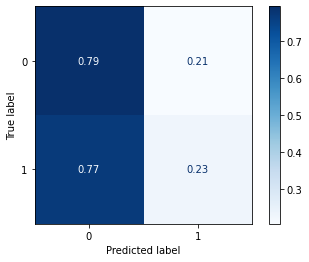

In [56]:
clf_dummy = DummyClassifier(random_state=12345) 
dummy_model = DummyClassifier(strategy='stratified', random_state=12345)
dummy_model.fit(features_train, target_train)
dummy_pred = dummy.predict(features_test)
plot_confusion_matrix(estimator=dummy_model, X=features_test, y_true=target_test,
                      normalize='true', cmap='Blues')
print('Dummy-Model Confusion Matrix')

Random Forest Model Confusion Matrix


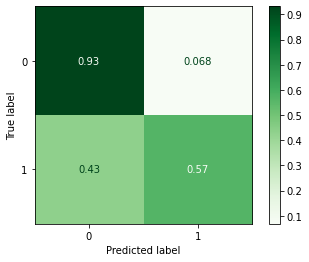

In [57]:
plot_confusion_matrix(estimator=best_model_rf2, X=features_test, y_true=target_test,
                      normalize='true', cmap='Greens')
print('Random Forest Model Confusion Matrix')

The model created does not predict perfectly, but the results are much better than for dummy-model. More than a half positive target values have been predicter correctly, and almost all negative as well.

### ROC-curve and AUC-ROC

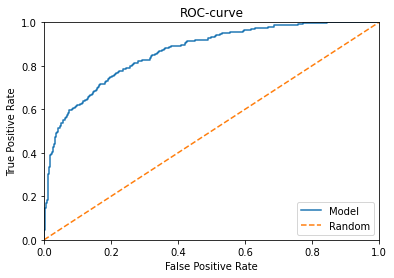

In [58]:
probabilities_test = best_model_rf2.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]


fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr, label='Model')

# ROC-curve for random model
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel("False Positive Rate") 
plt.ylabel("True Positive Rate")

plt.title("ROC-curve")
plt.legend(loc='lower right')


plt.show()

In [59]:
roc_auc_score(target_test, probabilities_one_test)

0.8641619506742123

ROC-curve and ROC-AUC metric testify for RF model sufficient quality. 

## Overall Conclusion

- Data prepared:
    - numeric features normalized
    - categorial features processed with OHE
    - features and targets determined, data split in subsets
- Models not taking into account class disbalance have been created and analysed - all models' F1-scores do not satisfy quality condition
- 3 ways to fight disbalance have been created:
    - Class weighting did not acqure satisfactory result
    - 4 times Upsampling and Downsampling were most effective in terms of meeting F1 criteria
    - Hyperparameters chosen for best Random Forest model
- Chosen best model has passed testing:
    - F1-score = 0.62, above cut-off value
    - Confusion matrix prove sufficient model quality, model passed sanity test
    - ROC-AUC = 0.86, noticeably higher than for random model